In [134]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_column', None)

In [3]:
data_file_path = "./data/output_revised.csv"

In [106]:
df = pd.read_csv(data_file_path)

In [98]:
df[df['ID']==1]

,district,year,month,district_SPH,malaria_cases_u5,diarr_cases_u5,population,tmin,tmax,RH,precipitation,ndvi,ADM1_PT,ADM2_PT,ADM2_PCODE,ID,prop_poor,prop_Number_of_children_3plus,prop_Rural,prop_drinking_TreatedWater,prop_Time_get_Water60_plus_min,prop_No_Toilet,prop_Has_Electricity,prop_Has_Radio,prop_floor_Material_natural,prop_Sleeping_Rooms_3plus,prop_share_Toilet,prop_Has_sleeping_mosquito_net,prop_some_or_all_children_slept_under_net_last_night,prop_house_holds_share_toilet_9Plus,prop_Has_mobilephone,prop_dwelling_sprayed_last_12_Months,prop_with_3Plus_mosquito_nets,prop_children_under_mosquito_bed_nets_previous_night2Plus,prop_uneducated,number_of_doctors,Name_of_healthcare_facility1
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,alto molocue,2016,1,alto molocue,5361.0,361.0,398318.033138,21.294078,30.052979,84.781250,316.312258,0.249722,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
2016-02-01,alto molocue,2016,2,alto molocue,4417.0,213.0,398318.033138,21.270510,29.678297,87.459821,129.972256,0.323964,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
2016-03-01,alto molocue,2016,3,alto molocue,5778.0,193.0,398318.033138,22.023369,29.522761,89.664286,354.284895,0.312545,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
2016-04-01,alto molocue,2016,4,alto molocue,3573.0,92.0,398318.033138,19.596098,26.568178,90.843750,85.360640,0.289376,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
2016-05-01,alto molocue,2016,5,alto molocue,3306.0,124.0,398318.033138,16.402166,25.480120,85.982143,0.818778,0.298299,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
2016-06-01,alto molocue,2016,6,alto molocue,4059.0,188.0,398318.033138,14.232551,24.109602,79.625000,2.470135,0.318322,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
2016-07-01,alto molocue,2016,7,alto molocue,3018.0,189.0,398318.033138,14.142097,24.679667,75.303571,1.180000,0.238556,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
2016-08-01,alto molocue,2016,8,alto molocue,2066.0,146.0,398318.033138,13.982679,25.927002,68.084821,0.000000,0.219792,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0
2016-09-01,alto molocue,2016,9,alto molocue,4296.0,227.0,398318.033138,16.379798,28.862737,60.321429,0.000000,0.177020,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0


In [107]:
# df.head()
df.drop('Unnamed: 0', axis=1, inplace=True)
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))


In [108]:
df = df.set_index('datetime')

- train data is from beginnig of data to start 2018-03
- test_data is from 2018-03 till the end of the data, we predict for this test set and visualize comparing performance overlayed.

In [109]:
# train_data = df[df['datetime'] < '2018-03-01']
# test_data = df[(df['datetime'] >= '2018-03-01')]
# eval_data = df[df['datetime'] > '2018-06-01'].reset_index()

train_data = df[df.index < '2018-03-01']
test_data = df[df.index >= '2018-03-01']


In [105]:
df.fillna(0, inplace=True)

In [8]:
train_data.columns

Index(['index', 'district', 'year', 'month', 'district_SPH',
       'malaria_cases_u5', 'diarr_cases_u5', 'population', 'tmin', 'tmax',
       'RH', 'precipitation', 'ndvi', 'ADM1_PT', 'ADM2_PT', 'ADM2_PCODE', 'ID',
       'prop_poor', 'prop_Number_of_children_3plus', 'prop_Rural',
       'prop_drinking_TreatedWater', 'prop_Time_get_Water60_plus_min',
       'prop_No_Toilet', 'prop_Has_Electricity', 'prop_Has_Radio',
       'prop_floor_Material_natural', 'prop_Sleeping_Rooms_3plus',
       'prop_share_Toilet', 'prop_Has_sleeping_mosquito_net',
       'prop_some_or_all_children_slept_under_net_last_night',
       'prop_house_holds_share_toilet_9Plus', 'prop_Has_mobilephone',
       'prop_dwelling_sprayed_last_12_Months', 'prop_with_3Plus_mosquito_nets',
       'prop_children_under_mosquito_bed_nets_previous_night2Plus',
       'prop_uneducated', 'number_of_doctors', 'Name_of_healthcare_facility1',
       'datetime'],
      dtype='object')

In [130]:
X = train_data.copy()
y = X[['ID','malaria_cases_u5']]
X = X.drop('malaria_cases_u5', axis=1)

In [ ]:
X.fillna(X.mean(), inplace=True)


In [76]:
y 

datetime
2016-01-01    5361.0
2016-02-01    4417.0
2016-03-01    5778.0
2016-04-01    3573.0
2016-05-01    3306.0
               ...  
2017-10-01     392.0
2017-11-01     170.0
2017-12-01     410.0
2018-01-01     960.0
2018-02-01     752.0
Name: malaria_cases_u5, Length: 4134, dtype: float64

In [16]:
district_id_mapper = dict(zip(X['ID'], X['district']))

In [29]:
cols_to_drop = ['index','district','district_SPH','diarr_cases_u5',
                'year', 'month','ADM1_PT','ADM2_PT', 'ADM2_PCODE','datetime', 'ID']

X_mi = X.copy()
X_mi = X_mi.drop(cols_to_drop, axis=1)

In [19]:
X_mi.isnull().sum()

population                                                     0
tmin                                                          26
tmax                                                          26
RH                                                             0
precipitation                                                  0
ndvi                                                          49
ID                                                             0
prop_poor                                                      0
prop_Number_of_children_3plus                                  0
prop_Rural                                                     0
prop_drinking_TreatedWater                                     0
prop_Time_get_Water60_plus_min                                 0
prop_No_Toilet                                                 0
prop_Has_Electricity                                           0
prop_Has_Radio                                                 0
prop_floor_Material_natur

### Using Mutual Information Score as feature selection:


In [21]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")



In [30]:
X_mi = X_mi.fillna(0)

In [31]:
mi_scores = make_mi_scores(X_mi, y)

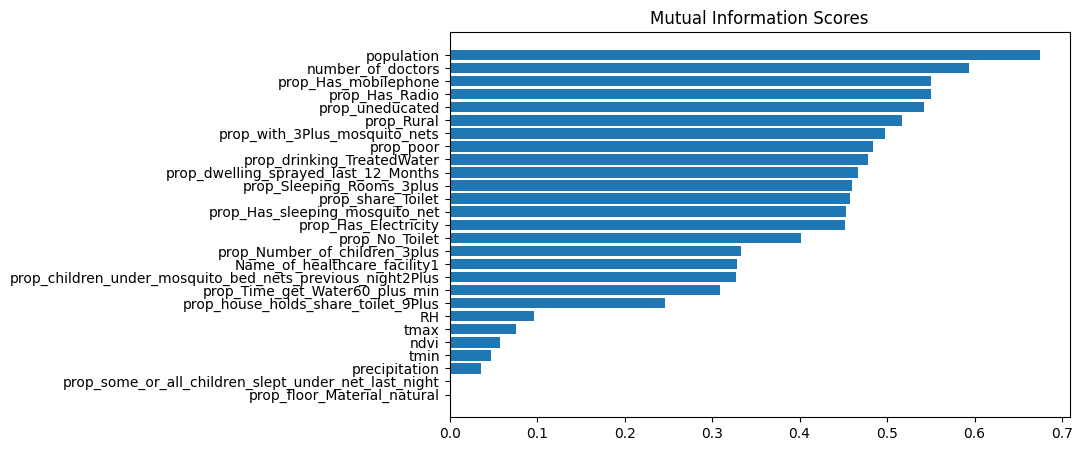

In [32]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [33]:
def drop_miscore_quantiles(X, mi_scores, quantile=0.10):

    quantile_threshold = mi_scores.quantile(quantile)
    selected_features = mi_scores[mi_scores > quantile_threshold].index

    X_filtered = X[selected_features]
    return X_filtered

In [36]:
X_filtered = drop_miscore_quantiles(X_mi, mi_scores)


In [38]:
print("Dropped features:", set(X_mi.columns) - set(X_filtered.columns))
print("Remaining features:", X_filtered.columns)

Dropped features: {'prop_floor_Material_natural', 'precipitation', 'prop_some_or_all_children_slept_under_net_last_night'}
Remaining features: Index(['population', 'number_of_doctors', 'prop_Has_mobilephone',
       'prop_Has_Radio', 'prop_uneducated', 'prop_Rural',
       'prop_with_3Plus_mosquito_nets', 'prop_poor',
       'prop_drinking_TreatedWater', 'prop_dwelling_sprayed_last_12_Months',
       'prop_Sleeping_Rooms_3plus', 'prop_share_Toilet',
       'prop_Has_sleeping_mosquito_net', 'prop_Has_Electricity',
       'prop_No_Toilet', 'prop_Number_of_children_3plus',
       'Name_of_healthcare_facility1',
       'prop_children_under_mosquito_bed_nets_previous_night2Plus',
       'prop_Time_get_Water60_plus_min', 'prop_house_holds_share_toilet_9Plus',
       'RH', 'tmax', 'ndvi', 'tmin'],
      dtype='object')


#### Resulting Features:

In [44]:
features = ['ID', 'population', 'number_of_doctors', 'prop_Has_mobilephone',
       'prop_Has_Radio', 'prop_uneducated', 'prop_Rural',
       'prop_with_3Plus_mosquito_nets', 'prop_poor',
       'prop_drinking_TreatedWater', 'prop_dwelling_sprayed_last_12_Months',
       'prop_Sleeping_Rooms_3plus', 'prop_share_Toilet',
       'prop_Has_sleeping_mosquito_net', 'prop_Has_Electricity',
       'prop_No_Toilet', 'prop_Number_of_children_3plus',
       'Name_of_healthcare_facility1',
       'prop_children_under_mosquito_bed_nets_previous_night2Plus',
       'prop_Time_get_Water60_plus_min', 'prop_house_holds_share_toilet_9Plus',
       'RH', 'tmax', 'ndvi', 'tmin']


In [40]:
X.head()

,index,district,year,month,district_SPH,diarr_cases_u5,population,tmin,tmax,RH,precipitation,ndvi,ADM1_PT,ADM2_PT,ADM2_PCODE,ID,prop_poor,prop_Number_of_children_3plus,prop_Rural,prop_drinking_TreatedWater,prop_Time_get_Water60_plus_min,prop_No_Toilet,prop_Has_Electricity,prop_Has_Radio,prop_floor_Material_natural,prop_Sleeping_Rooms_3plus,prop_share_Toilet,prop_Has_sleeping_mosquito_net,prop_some_or_all_children_slept_under_net_last_night,prop_house_holds_share_toilet_9Plus,prop_Has_mobilephone,prop_dwelling_sprayed_last_12_Months,prop_with_3Plus_mosquito_nets,prop_children_under_mosquito_bed_nets_previous_night2Plus,prop_uneducated,number_of_doctors,Name_of_healthcare_facility1,datetime
0,0,alto molocue,2016,1,alto molocue,361.0,398318.033138,21.294078,30.052979,84.781250,316.312258,0.249722,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0,2016-01-01
1,1,alto molocue,2016,2,alto molocue,213.0,398318.033138,21.270510,29.678297,87.459821,129.972256,0.323964,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0,2016-02-01
2,2,alto molocue,2016,3,alto molocue,193.0,398318.033138,22.023369,29.522761,89.664286,354.284895,0.312545,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0,2016-03-01
3,3,alto molocue,2016,4,alto molocue,92.0,398318.033138,19.596098,26.568178,90.843750,85.360640,0.289376,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0,2016-04-01
4,4,alto molocue,2016,5,alto molocue,124.0,398318.033138,16.402166,25.480120,85.982143,0.818778,0.298299,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0,2016-05-01


In [46]:
X = X[features]

In [135]:
def subset_train_sarimax(district_id, X=X, y=y):

    subset_idx = X[X['ID'] == district_id].index
    subset_x = X[X['ID'] == district_id].iloc[:, 1:]
    subset_y = y[y['ID'] == district_id]['malaria_cases_u5']

    x = subset_x[['RH','tmax','ndvi','tmin', 'population']]
    x.fillna(x.mean(), inplace=True)

    
    sarimax_model = auto_arima(subset_y, X=subset_x[['RH','tmax','ndvi','tmin', 'population']], seasonal=False,
                           suppress_warnings=True, stepwise=True)
    
    test_x = test_data[test_data['ID'] == district_id][['RH','tmax','ndvi','tmin', 'population']]

    predictions = pd.Series(sarimax_model.predict(n_periods=10, X = test_x))

    output_df = pd.DataFrame({
    'ID': [district_id] * len(predictions), 
    'predicted_cases': predictions
})

    return output_df

In [113]:
from tqdm.auto import tqdm

In [124]:
df['ID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159], dtype=int64)

In [141]:
final_output = pd.DataFrame(columns=['ID','predicted_cases'])
error_ids = []
for id_ in tqdm(df['ID'].unique(), total=df['ID'].nunique()):
    try:
        res_ = subset_train_sarimax(id_)
        final_output = pd.concat([final_output, res_])
    except Exception as e:
        print(f"Error {e} occurred on id : {id_}")
        error_ids.append(id_)
        continue    
    

 31%|███▏      | 50/159 [00:34<01:22,  1.31it/s]

Error exog contains inf or nans occurred on id : 51


 33%|███▎      | 53/159 [00:35<00:58,  1.80it/s]

Error exog contains inf or nans occurred on id : 54
Error exog contains inf or nans occurred on id : 55


100%|██████████| 159/159 [02:34<00:00,  1.03it/s]


In [142]:
final_output[final_output['ID'] == 159]

,ID,predicted_cases
2018-03-01,159,1623.179455
2018-04-01,159,1632.561985
2018-05-01,159,1229.755000
2018-06-01,159,1171.813107
2018-07-01,159,713.343510
2018-08-01,159,-14.767683
2018-09-01,159,-210.149345
2018-10-01,159,161.599506
2018-11-01,159,199.488758
2018-12-01,159,850.091138


In [137]:
final_output[final_output['predicted_cases'] < 0]

,ID,predicted_cases
56,6,-190.789169
98,10,-61.085640
118,12,-16.852885
163,17,-95.651488
164,17,-117.661435
...,...,...
1525,156,-358.907384
1533,157,-6.707987
1534,157,-22.437310
1555,159,-14.767683


In [128]:
error_ids 

[51, 54, 55]

In [120]:
subset_x = X[X['ID'] == error_ids[0]].iloc[:, 1:]
subset_x[['RH','tmax','ndvi','tmin', 'population']]

,RH,tmax,ndvi,tmin,population
datetime,,,,,
2016-01-01,82.901786,0.0,0.034674,0.0,9984.917525
2016-02-01,85.000000,0.0,0.152655,0.0,9984.917525
2016-03-01,88.992857,0.0,0.155712,0.0,9984.917525
2016-04-01,87.598214,0.0,0.157825,0.0,9984.917525
2016-05-01,79.178571,0.0,0.216517,0.0,9984.917525
2016-06-01,75.707143,0.0,0.202585,0.0,9984.917525
2016-07-01,72.482143,0.0,0.221032,0.0,9984.917525
2016-08-01,68.392857,0.0,0.241217,0.0,9984.917525
2016-09-01,67.928571,0.0,0.119733,0.0,9984.917525


In [82]:
subset_idx = X[X['ID'] == 3].index
subset_x = X[X['ID'] == 3].iloc[:, 1:]
subset_y = y[y['ID'] == 3]['malaria_cases_u5']

In [79]:
subset_x.shape

(26, 35)

In [78]:
subset_y.shape

(4134,)

In [63]:
subset_x[['RH','tmax','ndvi','tmin', 'population']]

,RH,tmax,ndvi,tmin,population
52,78.758929,32.146022,0.191375,25.068492,332396.782565
53,78.017857,32.042025,0.282083,25.106019,332396.782565
54,81.832143,31.796883,0.214156,25.357118,332396.782565
55,84.687500,29.321790,0.310842,23.855602,332396.782565
56,79.227679,28.402302,0.254537,20.385111,332396.782565
57,77.732143,26.521090,0.289847,18.861861,332396.782565
58,75.906250,26.691096,0.245633,18.085139,332396.782565
59,73.732143,26.793145,0.258167,16.450703,332396.782565
60,72.889286,28.248253,0.250018,17.091087,332396.782565
61,68.383929,30.264172,0.222791,18.104958,332396.782565


In [83]:
sarimax_model = auto_arima(subset_y, X=subset_x[['RH','tmax','ndvi','tmin', 'population']], seasonal=False,
                           suppress_warnings=True, stepwise=True)

In [65]:
sarimax_model

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [84]:
test_x = test_data[test_data['ID'] == 3][['RH','tmax','ndvi','tmin', 'population']]

In [85]:
test_x

,RH,tmax,ndvi,tmin,population
datetime,,,,,
2018-03-01,80.946429,31.393069,0.323706,21.132486,342678.487953
2018-04-01,77.517857,30.036860,0.279515,19.883420,342678.487953
2018-05-01,75.580357,28.046550,0.344607,18.439571,342678.487953
2018-06-01,76.906250,27.228435,0.286327,16.471306,342678.487953
2018-07-01,76.492857,26.653635,0.275526,14.844225,342678.487953
2018-08-01,73.508929,28.277634,0.289597,15.301420,342678.487953
2018-09-01,72.128571,29.003111,0.205857,17.713809,342678.487953
2018-10-01,70.794643,29.861556,0.156323,18.945695,342678.487953
2018-11-01,68.691964,30.953702,0.160261,19.231634,342678.487953


In [86]:
predictions = pd.Series(sarimax_model.predict(n_periods=10, X = test_x))

In [87]:
predictions

2018-03-01    3481.845574
2018-04-01    3374.656944
2018-05-01    4194.122688
2018-06-01    3916.111432
2018-07-01    3826.679015
2018-08-01    3319.542676
2018-09-01    2830.965670
2018-10-01    2354.413686
2018-11-01    1974.314994
2018-12-01    2275.183498
Freq: MS, dtype: float64

In [93]:
new_series = subset_df.copy()
new_series.update(predictions) 

In [94]:
new_series

datetime
2016-01-01    1940.000000
2016-02-01    3177.000000
2016-03-01    3541.000000
2016-04-01    3802.000000
2016-05-01    4607.000000
2016-06-01    3988.000000
2016-07-01    3697.000000
2016-08-01    3025.000000
2016-09-01    3137.000000
2016-10-01    2440.000000
2016-11-01    2094.000000
2016-12-01     500.000000
2017-01-01    2069.000000
2017-02-01    2386.000000
2017-03-01    2410.000000
2017-04-01    3883.000000
2017-05-01    3428.000000
2017-06-01    3280.000000
2017-07-01    3798.000000
2017-08-01    2540.000000
2017-09-01    3314.000000
2017-10-01    2717.000000
2017-11-01    2502.000000
2017-12-01    2431.000000
2018-01-01    3791.000000
2018-02-01    5021.000000
2018-03-01    3481.845574
2018-04-01    3374.656944
2018-05-01    4194.122688
2018-06-01    3916.111432
2018-07-01    3826.679015
2018-08-01    3319.542676
2018-09-01    2830.965670
2018-10-01    2354.413686
2018-11-01    1974.314994
2018-12-01    2275.183498
Name: malaria_cases_u5, dtype: float64

In [92]:
subset_df

datetime
2016-01-01    1940.0
2016-02-01    3177.0
2016-03-01    3541.0
2016-04-01    3802.0
2016-05-01    4607.0
2016-06-01    3988.0
2016-07-01    3697.0
2016-08-01    3025.0
2016-09-01    3137.0
2016-10-01    2440.0
2016-11-01    2094.0
2016-12-01     500.0
2017-01-01    2069.0
2017-02-01    2386.0
2017-03-01    2410.0
2017-04-01    3883.0
2017-05-01    3428.0
2017-06-01    3280.0
2017-07-01    3798.0
2017-08-01    2540.0
2017-09-01    3314.0
2017-10-01    2717.0
2017-11-01    2502.0
2017-12-01    2431.0
2018-01-01    3791.0
2018-02-01    5021.0
2018-03-01       NaN
2018-04-01       NaN
2018-05-01       NaN
2018-06-01       NaN
2018-07-01    4930.0
2018-08-01    4205.0
2018-09-01    4733.0
2018-10-01    3358.0
2018-11-01    3093.0
2018-12-01    2472.0
Name: malaria_cases_u5, dtype: float64

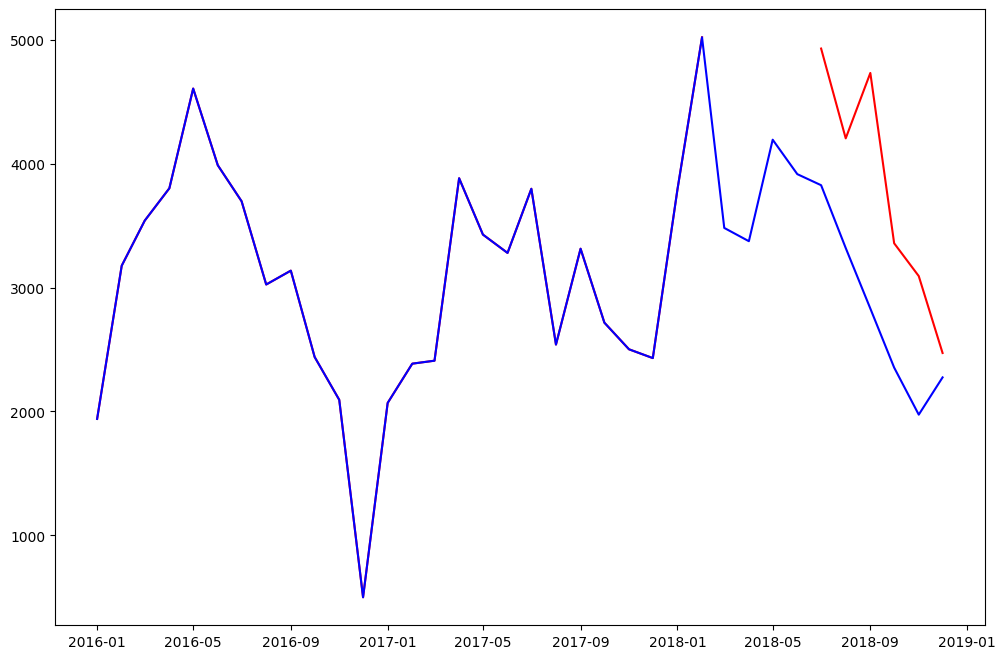

In [95]:
plt.figure(figsize=(12,8))

subset_df = df[df['ID'] == 3]['malaria_cases_u5']

plt.plot(subset_df, color='red')
plt.plot(new_series, color = 'blue');

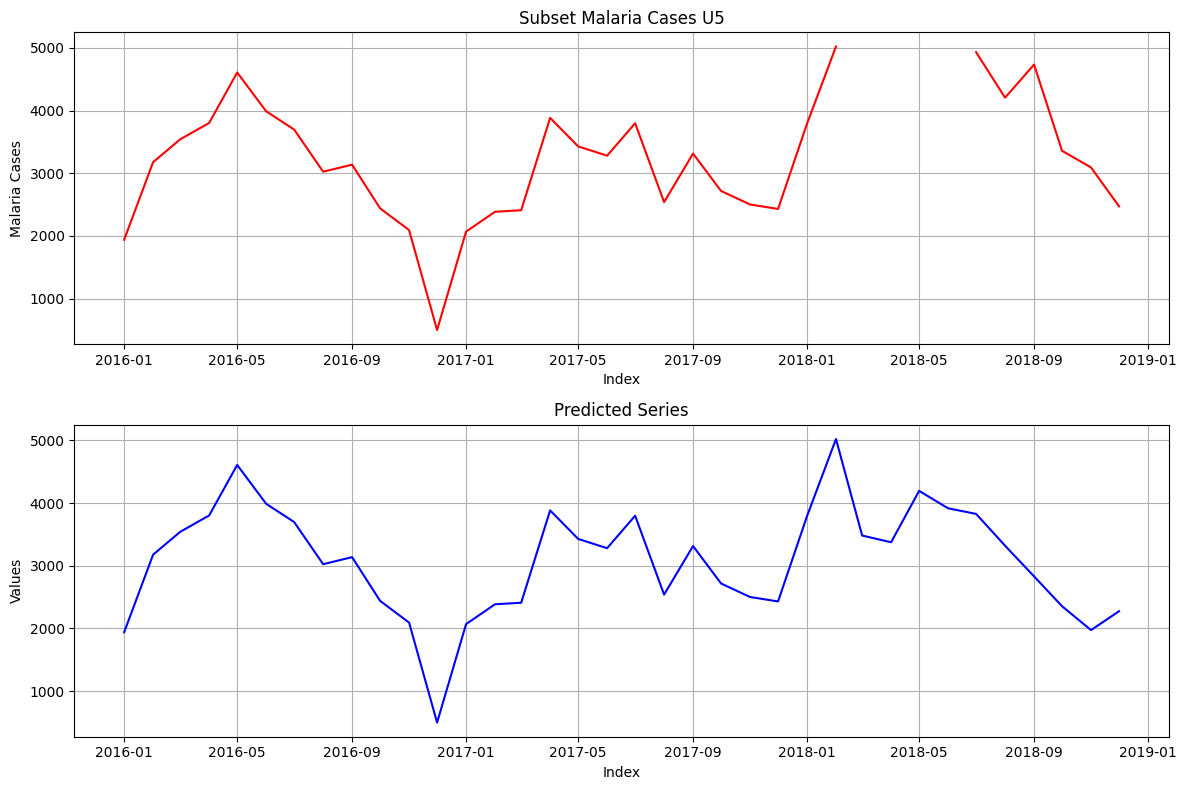

In [96]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))  # 2 rows, 1 column of subplots

axes[0].plot(subset_df, color='red')
axes[0].set_title('Subset Malaria Cases U5')
axes[0].set_ylabel('Malaria Cases')
axes[0].set_xlabel('Index')
axes[0].grid(True)

axes[1].plot(new_series, color='blue')
axes[1].set_title('Predicted Series')
axes[1].set_ylabel('Values')
axes[1].set_xlabel('Index')
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

In [158]:
vertical_line_date = pd.to_datetime('2018-02-01')
vertical_line_date_2 = pd.to_datetime('2018-07-01')


In [160]:
## checking predictions:

def plot_pred(district_id):
    subset_df = df[df['ID'] == district_id]['malaria_cases_u5']
    predictions = final_output[final_output['ID'] == district_id]['predicted_cases']

    new_series = subset_df.copy()
    new_series.update(predictions) 

    plt.figure(figsize=(12,8))


    plt.plot(subset_df, color='red')
    plt.axvline(vertical_line_date, color='green', linestyle='--')
    plt.axvline(vertical_line_date_2, color='green', linestyle='--')

    plt.plot(new_series, color = 'blue');

In [170]:
def plot_pred(district_id, ax):
    """
    Plots the malaria cases for a given district ID on the provided Axes.
    """
    subset_df = df[df['ID'] == district_id]['malaria_cases_u5']
    predictions = final_output[final_output['ID'] == district_id]['predicted_cases']

    new_series = subset_df.copy()
    new_series.update(predictions)

    # Plot on the provided axis
    ax.plot(subset_df, color='red', label='Observed')
    ax.axvline(vertical_line_date, color='green', linestyle='--')
    ax.axvline(vertical_line_date_2, color='green', linestyle='--')
    ax.plot(new_series, color='blue', label='Predicted')

    ax.set_title(f'District {district_id}')
    ax.legend()
    ax.tick_params(axis='x', rotation=45);


In [165]:
import random


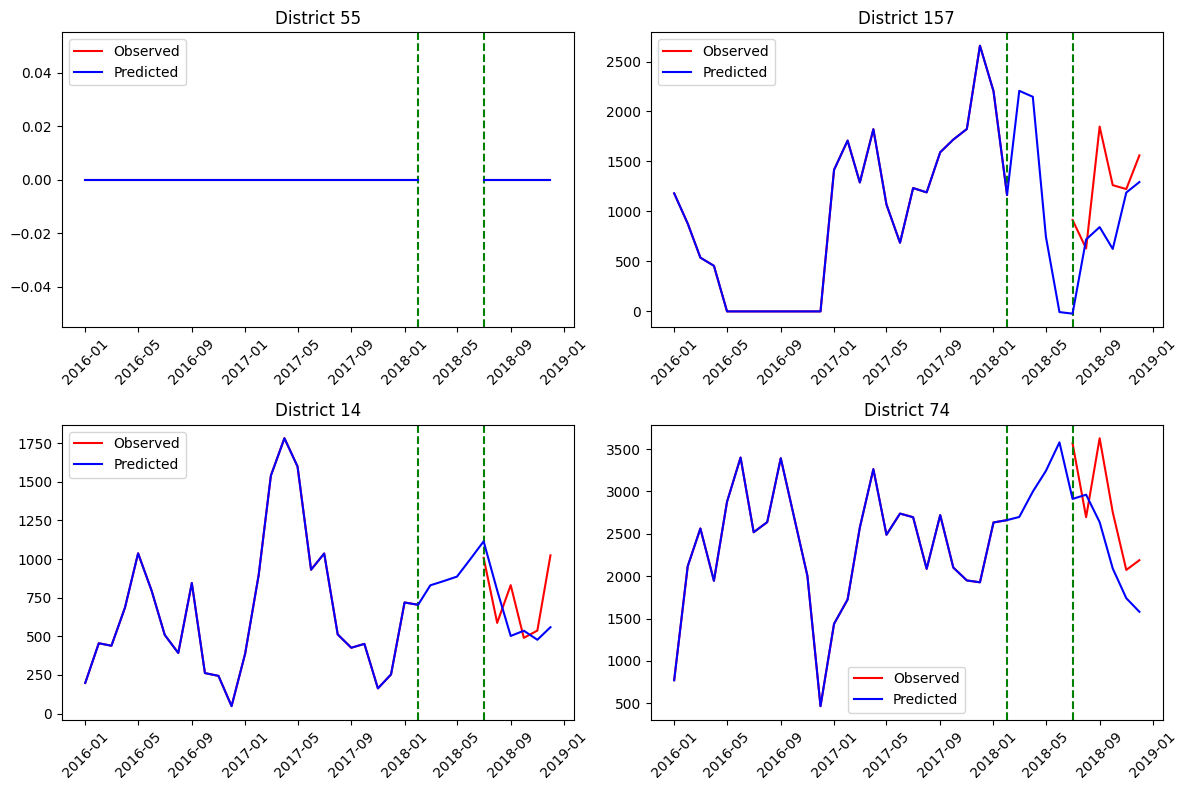

In [185]:
all_district_ids = list(df['ID'].unique())  # Replace with actual district IDs
selected_districts = random.sample(all_district_ids, 4)

# Create a 3x3 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Loop through each subplot and call plot_pred
for i, ax in enumerate(axes):
    district_id = selected_districts[i]
    plot_pred(district_id, ax)

# Adjust layout and show the plot
plt.tight_layout()

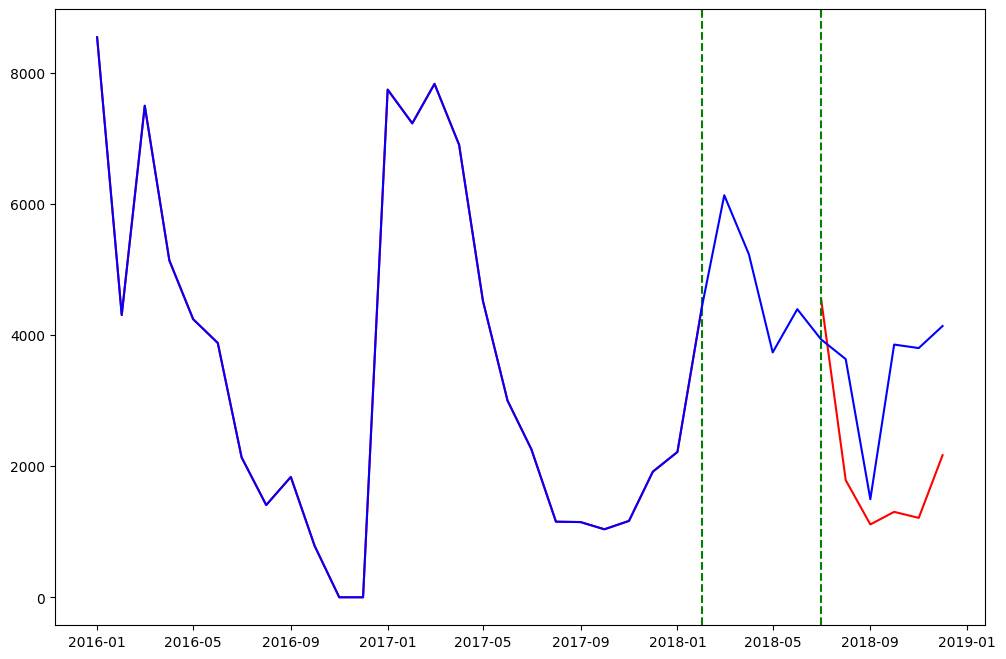

In [163]:
plot_pred(4)

In [147]:
predictions = final_output[final_output['ID'] == 159]['predicted_cases']

2018-03-01    1623.179455
2018-04-01    1632.561985
2018-05-01    1229.755000
2018-06-01    1171.813107
2018-07-01     713.343510
2018-08-01     -14.767683
2018-09-01    -210.149345
2018-10-01     161.599506
2018-11-01     199.488758
2018-12-01     850.091138
Name: predicted_cases, dtype: float64